## Exploratory Data Analysis: Flight Delay Metrics for ORD Departures

## Objective
### Calculate the **average delay** (in minutes) and the **percentage of flights departing later than scheduled** for flights departing from Chicago O'Hare International Airport (ORD) using the Flight Level Data.

### Approach
- Load `Flight Level Data.csv` and filter for ORD departures.
- Compute delays by subtracting `scheduled_departure_datetime_local` from `actual_departure_datetime_local`.
- Calculate the average delay and percentage of flights with positive delays.
- Visualize the delay distribution with a histogram.
- Save results to a CSV for reporting.

### Prerequisites
- Python 3.x
- Libraries: `pandas`, `matplotlib`, `seaborn`
- Dataset: `Flight Level Data.csv` with columns `scheduled_departure_datetime_local`, `actual_departure_datetime_local`, and `scheduled_departure_station_code`.
- Install libraries: `pip install pandas matplotlib seaborn`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

In [4]:
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('eda_delay_analysis.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

In [5]:
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
# Load and Filter Flight Data
def load_flight_data(file_path):
    """
    Load and filter flight data for ORD departures.
    
    Args:
        file_path (str): Path to the Flight Level Data CSV file.
    
    Returns:
        pd.DataFrame: Filtered DataFrame containing ORD departures.
    """
    try:
        logger.info(f"Loading flight data from {file_path}")
        df = pd.read_csv(file_path)
        # Filter for ORD departures
        df = df[df['scheduled_departure_station_code'] == 'ORD'].copy()
        logger.info(f"Loaded {len(df)} flights departing from ORD")
        return df
    except FileNotFoundError:
        logger.error(f"File {file_path} not found")
        raise
    except Exception as e:
        logger.error(f"Error loading data: {str(e)}")
        raise

# Load
flight_data_path = 'Flight Level Data.csv'
flight_df = load_flight_data(flight_data_path)

2025-10-04 12:35:22,341 - INFO - Loading flight data from Flight Level Data.csv
2025-10-04 12:35:22,415 - INFO - Loaded 8099 flights departing from ORD


In [7]:
# Calculate Delay Metrics
def calculate_delay_metrics(df):
    """
    Calculate average delay and percentage of delayed flights.
    
    Args:
        df (pd.DataFrame): DataFrame with flight data.
    
    Returns:
        dict: Dictionary containing average delay and percentage of delayed flights.
    """
    try:
        logger.info("Calculating delay metrics")
        # Ensure required columns exist
        required_columns = ['scheduled_departure_datetime_local', 'actual_departure_datetime_local']
        if not all(col in df.columns for col in required_columns):
            raise ValueError("Required columns for delay calculation are missing")

        # Convert datetime columns
        df['scheduled_departure_datetime_local'] = pd.to_datetime(
            df['scheduled_departure_datetime_local'], errors='coerce'
        )
        df['actual_departure_datetime_local'] = pd.to_datetime(
            df['actual_departure_datetime_local'], errors='coerce'
        )

        # Calculate delay in minutes
        df['delay_minutes'] = (
            (df['actual_departure_datetime_local'] - df['scheduled_departure_datetime_local'])
            .dt.total_seconds() / 60
        )

        # Handle missing delays
        initial_row_count = len(df)
        df = df.dropna(subset=['delay_minutes'])
        if len(df) < initial_row_count:
            logger.warning(f"Dropped {initial_row_count - len(df)} rows due to missing delay data")

        # Calculate metrics
        avg_delay = df['delay_minutes'].mean()
        delayed_flights = df[df['delay_minutes'] > 0]
        percent_delayed = (len(delayed_flights) / len(df)) * 100 if len(df) > 0 else 0

        metrics = {
            'average_delay_minutes': round(avg_delay, 2),
            'percent_delayed_flights': round(percent_delayed, 2),
            'total_flights': len(df),
            'delayed_flights': len(delayed_flights)
        }
        logger.info(f"Delay metrics: {metrics}")
        return metrics, df
    except Exception as e:
        logger.error(f"Error calculating delay metrics: {str(e)}")
        raise

# Calculate metrics
metrics, flight_df = calculate_delay_metrics(flight_df)

# Display results
print(f"Average Delay: {metrics['average_delay_minutes']} minutes")
print(f"Percentage of Delayed Flights: {metrics['percent_delayed_flights']}%")
print(f"Total Flights Analyzed: {metrics['total_flights']}")
print(f"Delayed Flights: {metrics['delayed_flights']}")

2025-10-04 12:35:25,380 - INFO - Calculating delay metrics
2025-10-04 12:35:25,468 - INFO - Delay metrics: {'average_delay_minutes': np.float64(21.18), 'percent_delayed_flights': 49.61, 'total_flights': 8099, 'delayed_flights': 4018}


Average Delay: 21.18 minutes
Percentage of Delayed Flights: 49.61%
Total Flights Analyzed: 8099
Delayed Flights: 4018


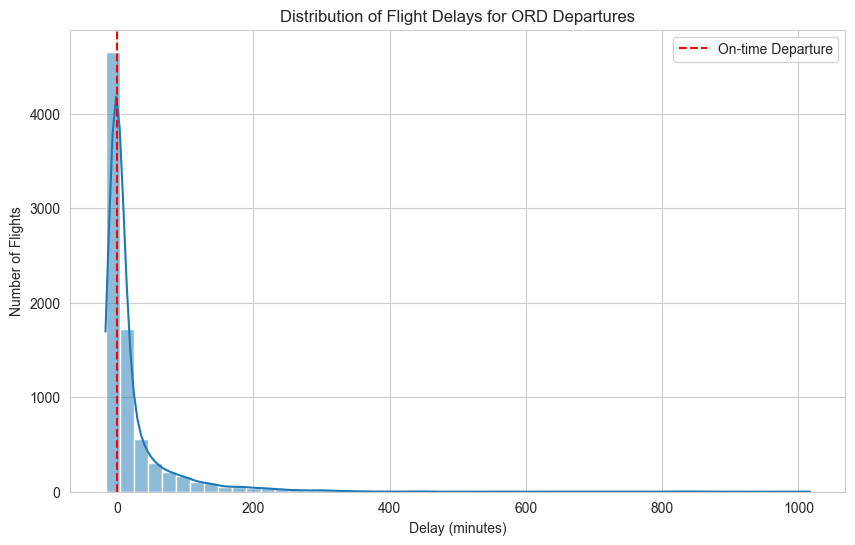

In [8]:
# Visualize Delay Distribution
plt.figure(figsize=(10, 6))
sns.histplot(flight_df['delay_minutes'], bins=50, kde=True)
plt.title('Distribution of Flight Delays for ORD Departures')
plt.xlabel('Delay (minutes)')
plt.ylabel('Number of Flights')
plt.axvline(x=0, color='red', linestyle='--', label='On-time Departure')
plt.legend()
plt.show()

In [10]:
def save_results(metrics, output_path):
    """
    Save delay metrics to a CSV file.
    
    Args:
        metrics (dict): Dictionary containing delay metrics.
        output_path (str): Path to save the output CSV.
    """
    try:
        logger.info(f"Saving results to {output_path}")
        results_df = pd.DataFrame([metrics])
        results_df.to_csv(output_path, index=False)
        logger.info("Results saved successfully")
    except Exception as e:
        logger.error(f"Error saving results: {str(e)}")
        raise

# Save to CSV
save_results(metrics, 'results/delay_metrics.csv')

2025-10-04 12:35:44,222 - INFO - Saving results to results/delay_metrics.csv
2025-10-04 12:35:44,235 - INFO - Results saved successfully
